In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import datetime as dt


In [7]:
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2025, 10, 19)

df = yf.download('AAPL', start=start, end=end)
print(df.head())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16920\766831392.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2014-01-02  17.173336  17.294422  17.138874  17.252508  234684800
2014-01-03  16.796108  17.191032  16.779031  17.164953  392467600
2014-01-06  16.887690  16.976795  16.566968  16.686502  412610800
2014-01-07  16.766924  16.950725  16.701103  16.899807  317209200
2014-01-08  16.873106  16.938305  16.725009  16.728734  258529600


In [8]:
    df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900
2025-10-14,247.770004,248.850006,244.699997,246.600006,35478000
2025-10-15,249.339996,251.820007,247.470001,249.490005,33893600
2025-10-16,247.449997,249.039993,245.130005,248.250000,39777000
2025-10-17,252.289993,253.380005,247.270004,248.020004,49147000


In [9]:
df = df.reset_index()

In [10]:
df = df.drop(['Date'], axis = 1)
df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16920\3725345457.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,17.173336,17.294422,17.138874,17.252508,234684800
1,16.796108,17.191032,16.779031,17.164953,392467600
2,16.887690,16.976795,16.566968,16.686502,412610800
3,16.766924,16.950725,16.701103,16.899807,317209200
4,16.873106,16.938305,16.725009,16.728734,258529600


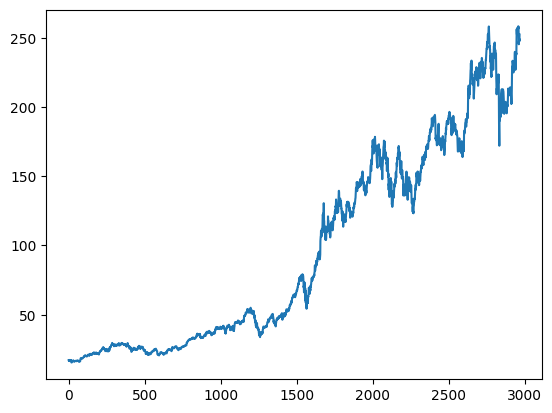

In [11]:
plt.plot(df.Close)

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2962,221.472229
2963,221.931320
2964,222.413403
2965,222.937417


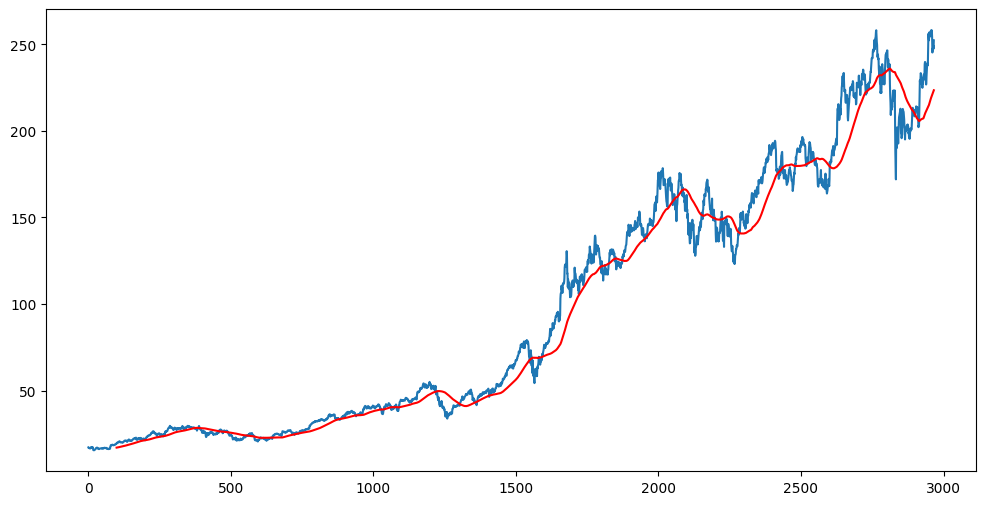

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [15]:
data_training.head()

Ticker,AAPL
0,17.173336
1,16.796108
2,16.887690
3,16.766924
4,16.873106


In [16]:
data_testing.head()

Ticker,AAPL
2076,171.406250
2077,171.111771
2078,175.165985
2079,171.848007
2080,168.677261


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01016652],
       [0.0078512 ],
       [0.0084133 ],
       ...,
       [0.96277426],
       [0.98301873],
       [0.97584891]], shape=(2076, 1))

In [22]:
x_train =[]
y_train =[]
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

Machine Learning Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [37]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


C:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50)

NameError: name 'model' is not defined

In [40]:
model.save('keras_model.h5')

In [41]:
data_testing.head()

Ticker,AAPL
2076,171.406265
2077,171.111771
2078,175.165970
2079,171.848007
2080,168.677261


In [42]:
past_100_days = data_training.tail(100)

In [46]:

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [47]:
final_df.head()

Ticker,AAPL
0,148.315369
1,147.491837
2,147.854538
3,145.021210
4,144.972168


In [48]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.85681483e-01],
       [1.79573208e-01],
       [1.82263425e-01],
       [1.61248159e-01],
       [1.60884408e-01],
       [1.76300696e-01],
       [1.76373582e-01],
       [1.83645316e-01],
       [2.01752274e-01],
       [2.33602764e-01],
       [2.53091160e-01],
       [2.56508992e-01],
       [2.59344980e-01],
       [2.63198769e-01],
       [2.25894167e-01],
       [2.50836788e-01],
       [2.87632094e-01],
       [2.83778305e-01],
       [2.76433345e-01],
       [2.62471607e-01],
       [2.87777753e-01],
       [3.30390355e-01],
       [3.58750467e-01],
       [3.54969111e-01],
       [3.90528185e-01],
       [3.63549850e-01],
       [3.53296695e-01],
       [3.89437499e-01],
       [3.38244045e-01],
       [3.30099490e-01],
       [3.19991768e-01],
       [3.43552384e-01],
       [3.62822688e-01],
       [3.67476865e-01],
       [3.96927551e-01],
       [3.89364613e-01],
       [3.90019455e-01],
       [3.81438716e-01],
       [3.76857312e-01],
       [4.09144100e-01],


In [49]:
input_data.shape

(991, 1)

In [50]:
x_test =[]
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(891, 100, 1)
(891,)


In [52]:
y_predicted = model.predict(x_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step


In [53]:
y_test

array([3.56950501e-01, 3.54766185e-01, 3.84836855e-01, 3.60226974e-01,
       3.36709025e-01, 3.38966114e-01, 3.24039768e-01, 2.92440078e-01,
       3.06347038e-01, 3.26297083e-01, 2.89090945e-01, 2.87489038e-01,
       3.04453927e-01, 3.03216224e-01, 2.97318685e-01, 2.63606999e-01,
       2.71543421e-01, 2.27274361e-01, 2.25599907e-01, 2.77077096e-01,
       2.33463217e-01, 2.35720532e-01, 2.46787769e-01, 2.94406188e-01,
       2.27055929e-01, 2.32451981e-01, 1.94388867e-01, 2.12253513e-01,
       1.53846498e-01, 1.25116749e-01, 1.58294579e-01, 1.46846389e-01,
       1.73826195e-01, 1.12429497e-01, 8.71270868e-02, 8.88766897e-02,
       1.29127402e-01, 1.09075045e-01, 1.10241673e-01, 1.34013252e-01,
       1.76742766e-01, 1.70909285e-01, 1.69961428e-01, 1.88190843e-01,
       1.45679987e-01, 1.51221584e-01, 1.69961428e-01, 1.64492490e-01,
       1.25700403e-01, 8.55225769e-02, 4.72409180e-02, 5.36574865e-02,
       7.31267556e-02, 3.39698425e-02, 4.49072087e-02, 7.63348701e-02,
      

In [54]:
y_predicted

array([[1.2414947 ],
       [1.2417957 ],
       [1.2406036 ],
       [1.2737678 ],
       [1.268932  ],
       [1.2398667 ],
       [1.2221233 ],
       [1.1922405 ],
       [1.1355902 ],
       [1.1108773 ],
       [1.1144615 ],
       [1.0747756 ],
       [1.0452933 ],
       [1.0425845 ],
       [1.0385933 ],
       [1.0291375 ],
       [0.98508006],
       [0.96276313],
       [0.8975248 ],
       [0.8492612 ],
       [0.8704248 ],
       [0.836544  ],
       [0.81540877],
       [0.8119934 ],
       [0.86147267],
       [0.82247263],
       [0.80172396],
       [0.7450142 ],
       [0.7238781 ],
       [0.6449525 ],
       [0.5582748 ],
       [0.5301663 ],
       [0.4967632 ],
       [0.50129807],
       [0.43910214],
       [0.37038976],
       [0.32080308],
       [0.32514817],
       [0.3069243 ],
       [0.29500943],
       [0.3112415 ],
       [0.36810702],
       [0.4033383 ],
       [0.42832547],
       [0.46616876],
       [0.44848362],
       [0.44215885],
       [0.457

In [55]:
scaler.scale_

array([0.00741717])

In [56]:
scale_factor = 1/0.00741717
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

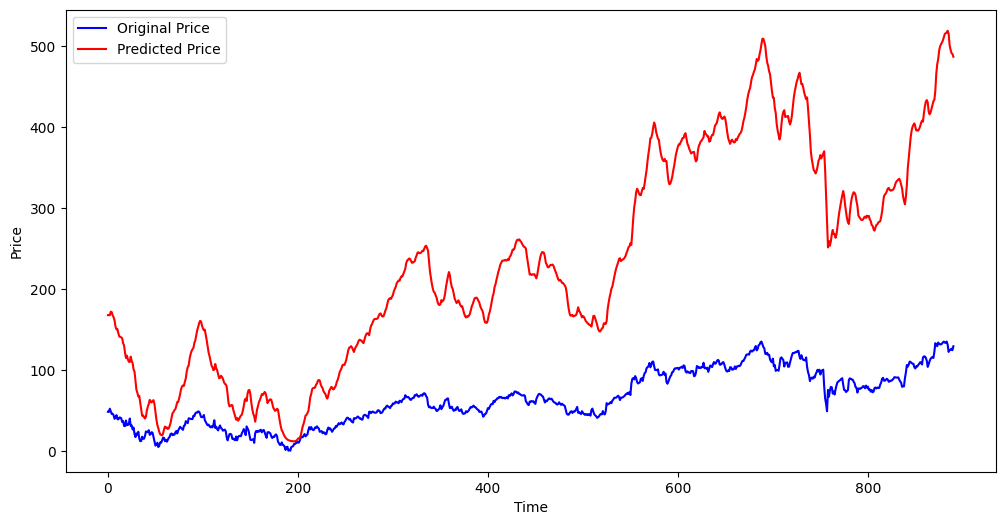

In [59]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [2]:
accuracy_score(y_test, y_predicted)

NameError: name 'accuracy_score' is not defined